In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('All_MTG_decks_for_land_prediction.csv',sep=",")

In [3]:
df

,Deck hyperlink,Total maindeck cards,Lands (without MDFCs),Average mana value (counting land/spell MDFCs as spells),Nonmythic land/spell MDFCs,Mythic land/spell MDFCs,Total land/spell MDFCs,Cheap card draw,Cheap mana prod,Sum of cheap card draw and cheap mana prod,Date of event,Format,Companion (based on sideboard inclusion),Companion present (1 or 0),Wins,Losses,Wins minus losses,Number of lands (incl partial MDFCs)
0,https://mtgmelee.com/Decklist/View/29181,60,28,3.750000,0,0,0,8,0,8,2020-07-01,Standard,NaN,0,2,1,1,28.0
1,https://mtgmelee.com/Decklist/View/29188,60,28,3.937500,0,0,0,4,4,8,2020-07-01,Standard,NaN,0,4,0,4,28.0
2,https://mtgmelee.com/Decklist/View/29190,60,26,3.382353,0,0,0,4,0,4,2020-07-01,Standard,NaN,0,3,1,2,26.0
3,https://mtgmelee.com/Decklist/View/29197,60,28,3.687500,0,0,0,4,0,4,2020-07-04,Standard,NaN,0,3,2,1,28.0
4,https://mtgmelee.com/Decklist/View/29211,60,29,3.709677,0,0,0,4,0,4,2020-07-01,Standard,NaN,0,2,1,1,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95138,https://magic.wizards.com/en/articles/archive/...,60,20,1.600000,0,0,0,6,2,8,2022-07-01,Modern,NaN,0,5,0,5,20.0
95139,https://magic.wizards.com/en/articles/archive/...,60,22,2.342105,0,0,0,0,8,8,2022-07-01,Modern,NaN,0,5,0,5,22.0
95140,https://magic.wizards.com/en/articles/archive/...,60,20,1.700000,0,0,0,10,1,11,2022-07-01,Modern,"Jegantha, the Wellspring",1,5,0,5,20.0
95141,https://magic.wizards.com/en/articles/archive/...,60,20,1.775000,0,0,0,0,0,0,2022-07-01,Modern,NaN,0,5,0,5,20.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95143 entries, 0 to 95142
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Deck hyperlink                                            95143 non-null  object 
 1   Total maindeck cards                                      95143 non-null  int64  
 2   Lands (without MDFCs)                                     95143 non-null  int64  
 3   Average mana value (counting land/spell MDFCs as spells)  95143 non-null  float64
 4   Nonmythic land/spell MDFCs                                95143 non-null  int64  
 5   Mythic land/spell MDFCs                                   95143 non-null  int64  
 6   Total land/spell MDFCs                                    95143 non-null  int64  
 7   Cheap card draw                                           95143 non-null  int64  
 8   Cheap mana prod 

In [5]:
df.isnull().sum()

Deck hyperlink                                                  0
Total maindeck cards                                            0
Lands (without MDFCs)                                           0
Average mana value (counting land/spell MDFCs as spells)        0
Nonmythic land/spell MDFCs                                      0
Mythic land/spell MDFCs                                         0
Total land/spell MDFCs                                          0
Cheap card draw                                                 0
Cheap mana prod                                                 0
Sum of cheap card draw and cheap mana prod                      0
Date of event                                                   0
Format                                                          0
Companion (based on sideboard inclusion)                    81135
Companion present (1 or 0)                                      0
Wins                                                            0
Losses    

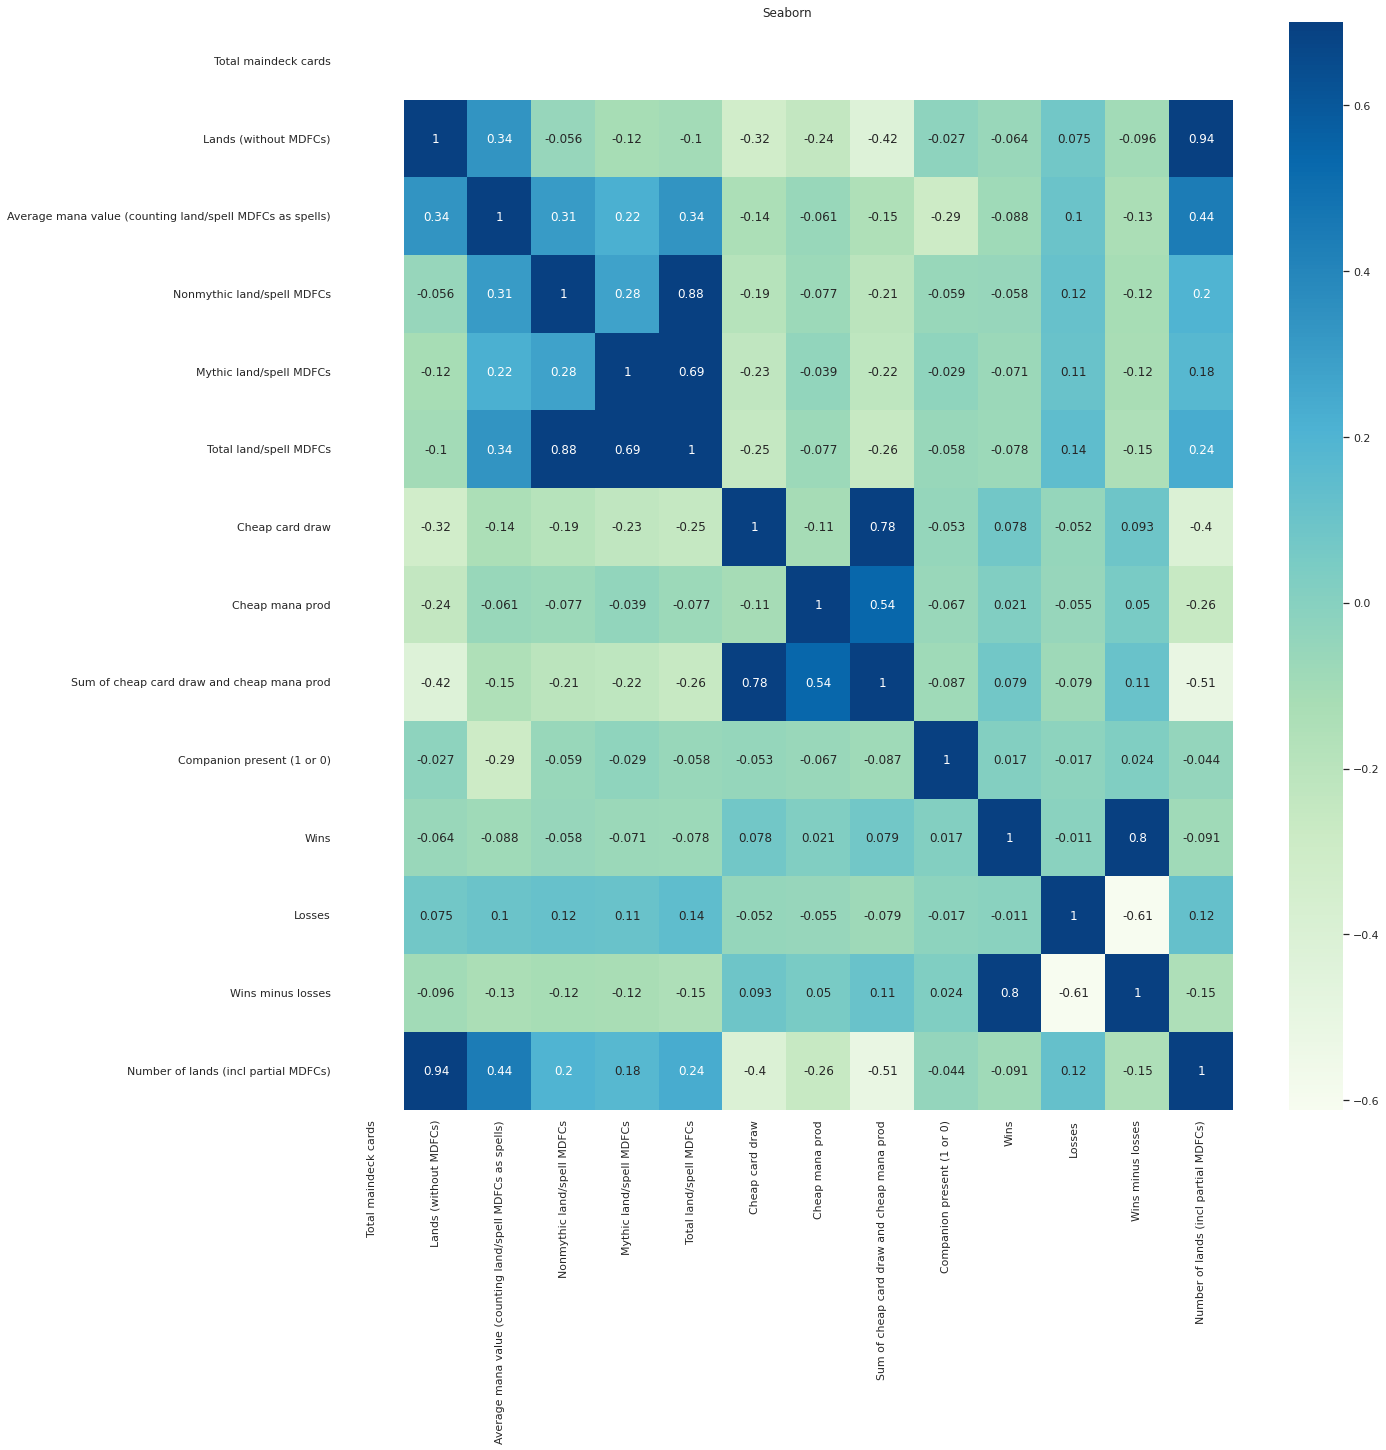

In [6]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(20,20))
plt.title("Seaborn")
sns.heatmap(df.corr(),vmax=0.7,annot=True,cmap="GnBu")

In [7]:
df = df.drop(['Deck hyperlink', 'Wins minus losses', 'Total land/spell MDFCs', 'Companion (based on sideboard inclusion)'],axis=1)

In [8]:
df

,Total maindeck cards,Lands (without MDFCs),Average mana value (counting land/spell MDFCs as spells),Nonmythic land/spell MDFCs,Mythic land/spell MDFCs,Cheap card draw,Cheap mana prod,Sum of cheap card draw and cheap mana prod,Date of event,Format,Companion present (1 or 0),Wins,Losses,Number of lands (incl partial MDFCs)
0,60,28,3.750000,0,0,8,0,8,2020-07-01,Standard,0,2,1,28.0
1,60,28,3.937500,0,0,4,4,8,2020-07-01,Standard,0,4,0,28.0
2,60,26,3.382353,0,0,4,0,4,2020-07-01,Standard,0,3,1,26.0
3,60,28,3.687500,0,0,4,0,4,2020-07-04,Standard,0,3,2,28.0
4,60,29,3.709677,0,0,4,0,4,2020-07-01,Standard,0,2,1,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95138,60,20,1.600000,0,0,6,2,8,2022-07-01,Modern,0,5,0,20.0
95139,60,22,2.342105,0,0,0,8,8,2022-07-01,Modern,0,5,0,22.0
95140,60,20,1.700000,0,0,10,1,11,2022-07-01,Modern,1,5,0,20.0
95141,60,20,1.775000,0,0,0,0,0,2022-07-01,Modern,0,5,0,20.0


In [9]:
df['Date of event'] =  pd.to_datetime(df['Date of event'])
df['month'] = df['Date of event'].apply(lambda date:date.month)
df['year'] = df['Date of event'].apply(lambda date:date.year)
df =  df.drop('Date of event', axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e1281f610>,
      dtype=object)

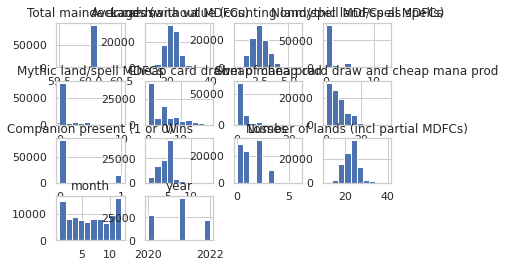

In [10]:
df.hist()

In [11]:
labelEncoder = LabelEncoder()
df_aux_labelEN = df
df_aux_labelEN['Format'] = labelEncoder.fit_transform(df_aux_labelEN['Format'])

In [12]:
X = df_aux_labelEN.drop('Number of lands (incl partial MDFCs)',axis=1)
y = df_aux_labelEN['Number of lands (incl partial MDFCs)']

In [13]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=800,test_size=0.30)


In [15]:
ann = Sequential()
ann.add(Dense(11,activation='relu'))  #no se encuentran distribuciones binomiales 
ann.add(Dense(6,activation='relu'))  #no se encuentran distribuciones binomiales 
ann.add(Dense(1))
#sgd = SGD(lr = 0.02,momentum=0.7)
ann.compile(optimizer='adam',loss='mse')
#rmsprop adam sgd
#categorical_crossentropy binary_crossentropy metrics='accuracy'
ann.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=800,epochs=100,verbose=1)

Epoch 1/100
84/84 [==============================] - 3s 5ms/step - loss: 519.5257 - val_loss: 494.9644
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 421.0286 - val_loss: 310.3354
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 184.2881 - val_loss: 72.2152
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 35.7225 - val_loss: 22.6259
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 21.1311 - val_loss: 19.5843
Epoch 6/100
84/84 [==============================] - 0s 3ms/step - loss: 18.4041 - val_loss: 17.0962
Epoch 7/100
84/84 [==============================] - 0s 4ms/step - loss: 16.0721 - val_loss: 14.9300
Epoch 8/100
84/84 [==============================] - 0s 4ms/step - loss: 14.0386 - val_loss: 13.0330
Epoch 9/100
84/84 [==============================] - 0s 3ms/step - loss: 12.2609 - val_loss: 11.3793
Epoch 10/100
84/84 [==============================] - 0s 3ms/step - loss: 10.7240 - va

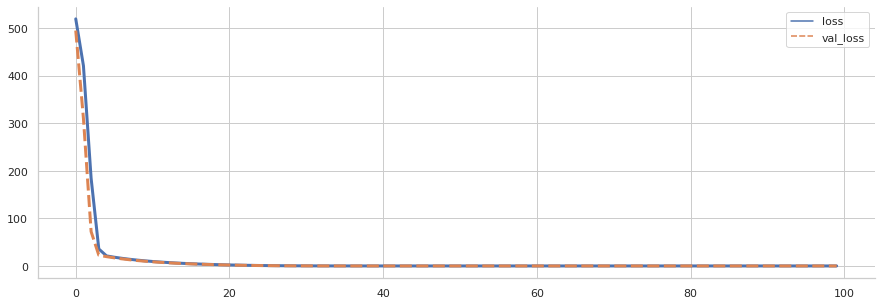

In [16]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

In [17]:
y_predic = ann.predict(X_test)
errorAbsoluto = mean_absolute_error(y_test,y_predic)
print(errorAbsoluto)

892/892 [==============================] - 1s 1ms/step
0.0009746607427887673


In [18]:
import pickle
with open("scaler_r.pkc", "wb") as file:
  pickle.dump(scaler, file)

ann.save("modelR.h5")

In [19]:
X.shape

(95143, 14)